In [1]:
import numpy as np
import pandas as pd 
pd.set_option("display.max_columns", 100)

import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score , classification_report# precision_score, recall_score, accuracy_score
# , f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [2]:
adult = pd.read_csv('adult.csv')
# adult = pd.read_csv('adult.csv')
print(adult.shape)
adult.head(5)

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
for col in adult.columns.to_list():
    if len(adult[col].value_counts().sort_values())<20:
        print(f'____________ {col} ____________')
        print(adult[col].value_counts())
        print('\n')

____________ workclass ____________
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


____________ education ____________
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64


____________ educational-num ____________
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational-num, dtype: int64


______

In [4]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
adult.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [6]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
numdf = adult.select_dtypes(include=['number'])
numdf

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30
...,...,...,...,...,...,...
48837,27,257302,12,0,0,38
48838,40,154374,9,0,0,40
48839,58,151910,9,0,0,40
48840,22,201490,9,0,0,20


________ age ________


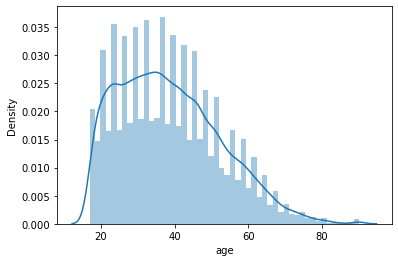



________ fnlwgt ________


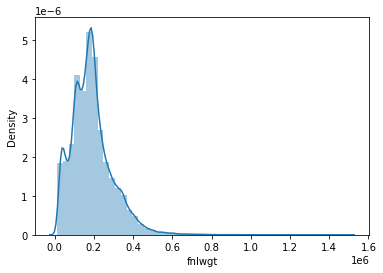



________ educational-num ________


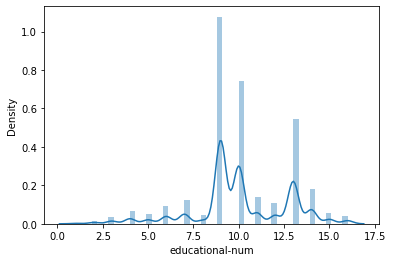



________ capital-gain ________


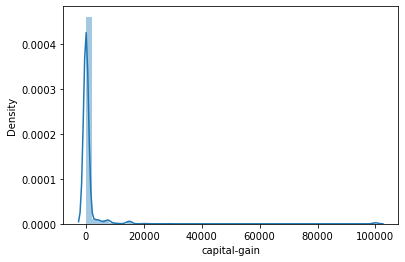



________ capital-loss ________


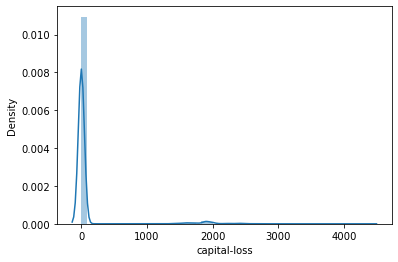



________ hours-per-week ________


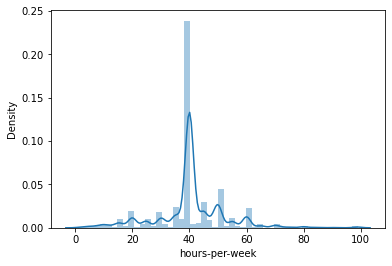

In [8]:
for col in numdf.columns:
    print("________",col,"________")
#     sns.boxplot(data=numdf,x=col);
#     plt.show();
    sns.distplot(numdf[col]);
    plt.show();
    print('\n')

In [9]:
objdf = adult.select_dtypes(include=['object'])
objdf

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


________ workclass ________


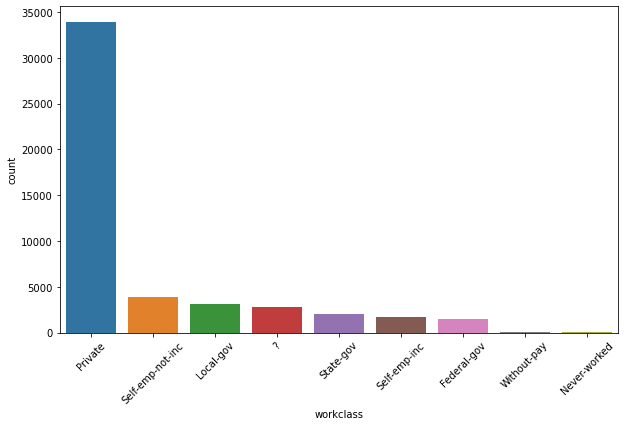



________ education ________


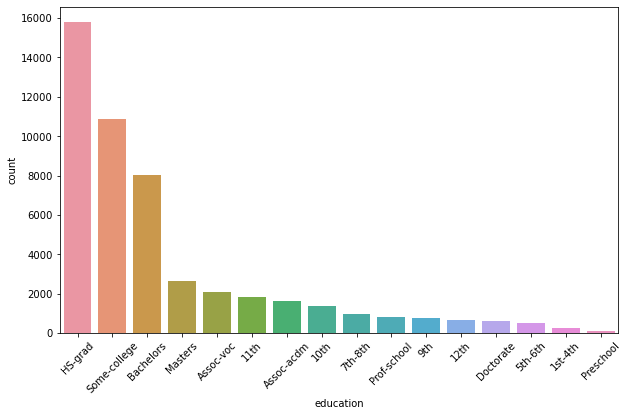



________ marital-status ________


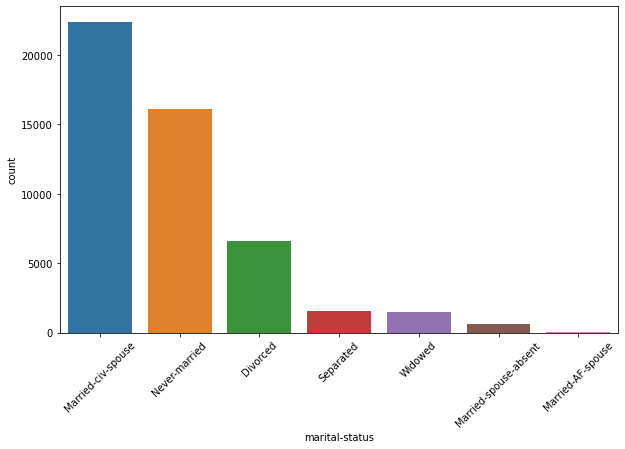



________ occupation ________


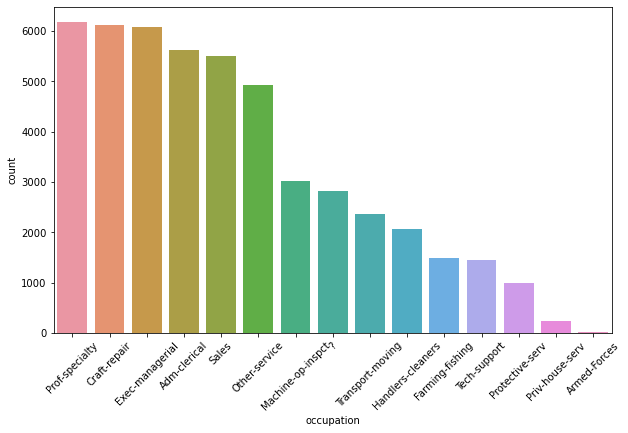



________ relationship ________


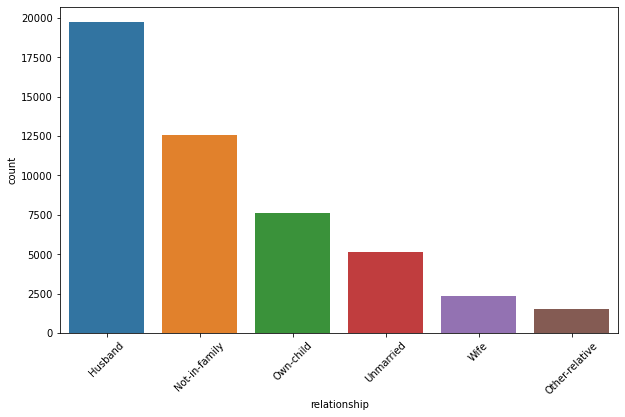



________ race ________


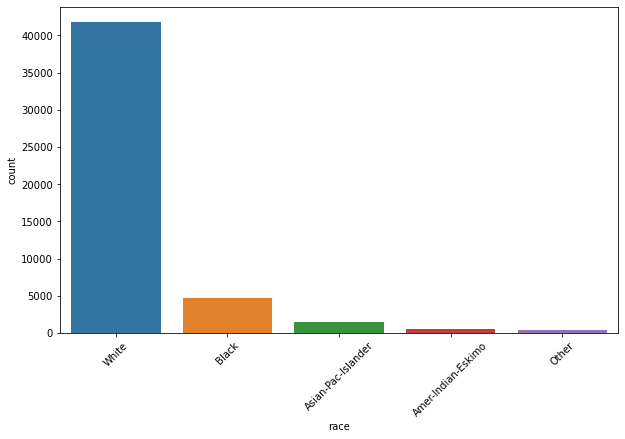



________ gender ________


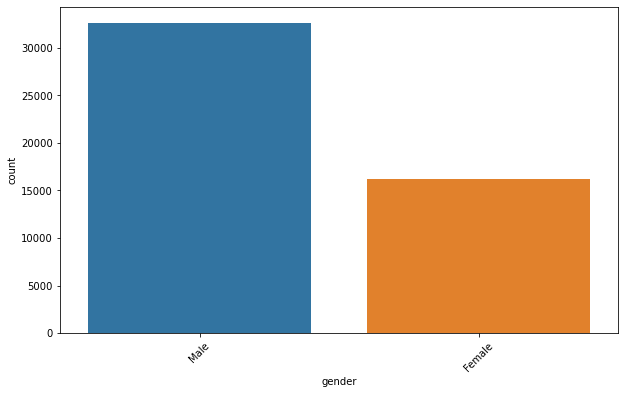



________ native-country ________


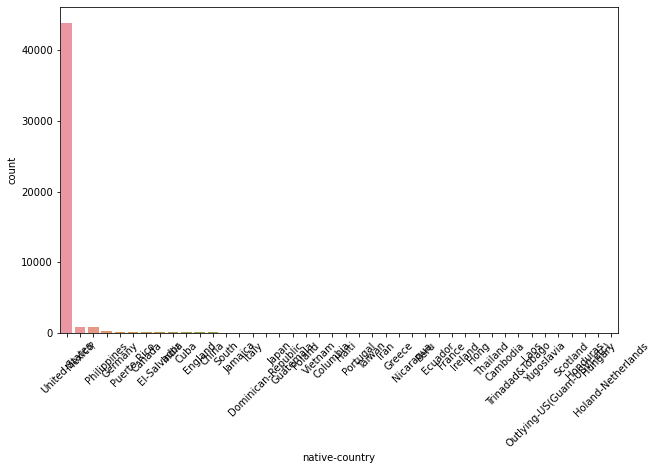



________ income ________


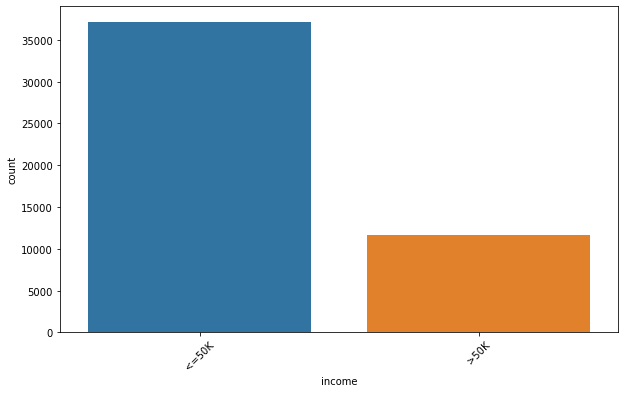

In [10]:
for col in objdf.columns:
    print("________",col,"________")
#     sns.boxplot(data=numdf,x=col);
#     plt.show();
    plt.figure(figsize= (10,6))
    sns.countplot(objdf[col] ,order = objdf[col].value_counts().index);
    plt.xticks(rotation=45)
    plt.show();
    print('\n')

In [11]:
adult.drop_duplicates(inplace=True)

In [12]:
train, test = train_test_split(adult, test_size=0.2,random_state=9110)

In [13]:
train.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [14]:
covtoNA_train = train.copy()
covtoNA_test = test.copy()

covtoNA_train.replace('?',np.nan,inplace=True)
covtoNA_test.replace('?',np.nan,inplace=True)

covtoNA_train.isnull().sum()

age                   0
workclass          2234
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2243
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      692
income                0
dtype: int64

In [15]:
droped_train = covtoNA_train.copy()
droped_test = covtoNA_test.copy()

droped_train.dropna(inplace=True)
droped_test.dropna(inplace=True)

In [16]:
replaced_test = train.copy()
replaced_train = test.copy()
for col in [ 'workclass' ,'occupation' , 'native-country']:
    replaced_test[col].replace('?',replaced_test[col].mode()[0],inplace=True)
    replaced_train[col].replace('?',replaced_test[col].mode()[0],inplace=True)

In [17]:
dataFrames =[train,test]
train = pd.get_dummies(pd.concat(dataFrames,axis = 0), drop_first=True)[ : dataFrames[0].shape[0]]
test = pd.get_dummies(pd.concat(dataFrames,axis = 0), drop_first=True)[ dataFrames[0].shape[0] : ]

dataFrames =[covtoNA_train,covtoNA_test]
covtoNA_train = pd.get_dummies(pd.concat(dataFrames,axis = 0), drop_first=True)[ : dataFrames[0].shape[0]]
covtoNA_test = pd.get_dummies(pd.concat(dataFrames,axis = 0), drop_first=True)[ dataFrames[0].shape[0] : ]

dataFrames =[droped_train,droped_test]
droped_train = pd.get_dummies(pd.concat(dataFrames,axis = 0), drop_first=True)[ : dataFrames[0].shape[0]]
droped_test = pd.get_dummies(pd.concat(dataFrames,axis = 0), drop_first=True)[ dataFrames[0].shape[0] : ]

dataFrames =[replaced_train,replaced_test]
replaced_train = pd.get_dummies(pd.concat(dataFrames,axis = 0), drop_first=True)[ : dataFrames[0].shape[0]]
replaced_test = pd.get_dummies(pd.concat(dataFrames,axis = 0), drop_first=True)[ dataFrames[0].shape[0] : ]

In [18]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier(random_state = 9110)
param_grid = {'max_depth': [*range(6,11)],'criterion':['gini', 'entropy']}

print("Classification where leave them as ?")
X = train.iloc[:, :-1]
y = train.iloc[:, -1]
GS = GridSearchCV(model,param_grid,n_jobs=-1,cv=5).fit(X, y)
print(GS.best_params_)
print(GS.best_score_)

print("____________________________________________________")
print("Classification where convert ? to NA")
X = covtoNA_train.iloc[:, :-1].values
y = covtoNA_train.iloc[:, -1].values
GS = GridSearchCV(model,param_grid,n_jobs=-1,cv=5).fit(X, y)
print(GS.best_params_)
print(GS.best_score_)

print("____________________________________________________")
print("Classification where drop the na values (?)")
X = droped_train.iloc[:, :-1]
y = droped_train.iloc[:, -1]
GS = GridSearchCV(model,param_grid,n_jobs=-1,cv=5).fit(X, y)
print(GS.best_params_)
print(GS.best_score_)

print("____________________________________________________")
print("Classification where replace ? with mode")
X = replaced_train.iloc[:, :-1]
y = replaced_train.iloc[:, -1]
GS = GridSearchCV(model,param_grid,n_jobs=-1,cv=5).fit(X, y)
print(GS.best_params_)
print(GS.best_score_)

Classification where leave them as ?
{'criterion': 'entropy', 'max_depth': 10}
0.8559128712444973
____________________________________________________
Classification where convert ? to NA
{'criterion': 'entropy', 'max_depth': 10}
0.855938505688789
____________________________________________________
Classification where drop the na values (?)
{'criterion': 'gini', 'max_depth': 9}
0.8516077288205335
____________________________________________________
Classification where replace ? with mode
{'criterion': 'entropy', 'max_depth': 8}
0.8587820663636133


In [19]:
print("Classification where leave them as ?")
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values
GS = GridSearchCV(model,param_grid,n_jobs=-1,cv=5).fit(X, y)
final_model = GS.best_estimator_
final_model.fit(X,y)
y_pred_test = final_model.predict(test.iloc[:, :-1])
print(classification_report( test.iloc[:, -1],y_pred_test))

Classification where leave them as ?
              precision    recall  f1-score   support

           0       0.88      0.96      0.91      7498
           1       0.79      0.56      0.65      2260

    accuracy                           0.86      9758
   macro avg       0.83      0.76      0.78      9758
weighted avg       0.86      0.86      0.85      9758

